In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [18]:
karachi_prefix = "../data/karachi/Karachi_PM2.5_"
new_delhi_prefix = "../data/new_delhi/NewDelhi_PM2.5_"
karachi_suffix = "_YTD.csv"
new_delhi_suffix = "_YTD.csv"

In [19]:
def create_karachi_filepath(year):
    karachi_filepath = f"{karachi_prefix}{year}{karachi_suffix}"
    return karachi_filepath

In [20]:
def create_new_delhi_filepath(year):
    new_delhi_filepath = f"{new_delhi_prefix}{year}{new_delhi_suffix}"
    return new_delhi_filepath

In [21]:
def build_karachi_df(years):
    
    karachi_df = pd.read_csv(create_karachi_filepath(years[0]))
    years.pop(0)
    
    for year in years:
        karachi_df = pd.merge(karachi_df, pd.read_csv(create_karachi_filepath(year)), on='Site', how='inner')
    
    karachi_df = karachi_df.drop(["Parameter"], axis=1)
    karachi_df = karachi_df.replace(to_replace="Invalid", value=np.nan)
    karachi_df = karachi_df.dropna()
    
    return karachi_df

In [22]:
def build_delhi_df(years):
    
    delhi_df = pd.read_csv(create_new_delhi_filepath(years[0]))
    years.pop(0)
    
    for year in years:
        delhi_df = pd.merge(delhi_df, pd.read_csv(create_new_delhi_filepath(year)), on='Site', how='inner')
    
    delhi_df = delhi_df.drop(["Parameter"], axis=1)
    delhi_df = delhi_df.replace(to_replace="Invalid", value=np.nan)
    delhi_df = delhi_df.dropna()
    
    return delhi_df

In [23]:
karachi2019_df = build_karachi_df(["2019"])
karachi2020_df = build_karachi_df(["2020"])

In [24]:
delhi2019_df = build_delhi_df(["2019"])
delhi2020_df = build_delhi_df(["2020"])

FileNotFoundError: [Errno 2] No such file or directory: '../data/new_delhi/NewDelhi_PM2.5_2019_YTD.csv'

In [ ]:
karachi2019_df.tail()

,Site,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
5526,Karachi,2019-12-31 08:00 PM,2019,12,31,20,114.7,182,Unhealthy,131.8,UG/M3,1 Hr,Valid
5527,Karachi,2019-12-31 09:00 PM,2019,12,31,21,120.8,185,Unhealthy,127.3,UG/M3,1 Hr,Valid
5528,Karachi,2019-12-31 10:00 PM,2019,12,31,22,131.2,190,Unhealthy,143.2,UG/M3,1 Hr,Valid
5529,Karachi,2019-12-31 11:00 PM,2019,12,31,23,141.4,195,Unhealthy,153.5,UG/M3,1 Hr,Valid
5530,Karachi,2020-01-01 12:00 AM,2020,1,1,0,138.3,194,Unhealthy,134.6,UG/M3,1 Hr,Valid


In [ ]:
karachi2020_df.tail()

,Site,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
8413,Karachi,2020-12-31 08:00 PM,2020,12,31,20,60.4,154,Unhealthy,60.0,UG/M3,1 Hr,Valid
8414,Karachi,2020-12-31 09:00 PM,2020,12,31,21,68.8,158,Unhealthy,77.0,UG/M3,1 Hr,Valid
8415,Karachi,2020-12-31 10:00 PM,2020,12,31,22,70.9,159,Unhealthy,73.0,UG/M3,1 Hr,Valid
8416,Karachi,2020-12-31 11:00 PM,2020,12,31,23,78.4,163,Unhealthy,86.0,UG/M3,1 Hr,Valid
8417,Karachi,2021-01-01 12:00 AM,2021,1,1,0,74.2,161,Unhealthy,70.0,UG/M3,1 Hr,Valid


In [ ]:
delhi2019_df.tail()

NameError: name 'delhi2019_df' is not defined

In [ ]:
delhi2020_df.tail()

In [ ]:
karachi2019AQI = karachi2019_df["AQI"].to_numpy()
karachi2020AQI = karachi2020_df["AQI"].to_numpy()
karachi2019datetime = karachi2019_df["Date (LT)"].to_numpy()
karachi2020datetime = karachi2020_df["Date (LT)"].to_numpy()
print(karachi2019datetime)

['2019-05-14 10:00 AM' '2019-05-14 11:00 AM' '2019-05-14 12:00 PM' ...
 '2019-12-31 10:00 PM' '2019-12-31 11:00 PM' '2020-01-01 12:00 AM']


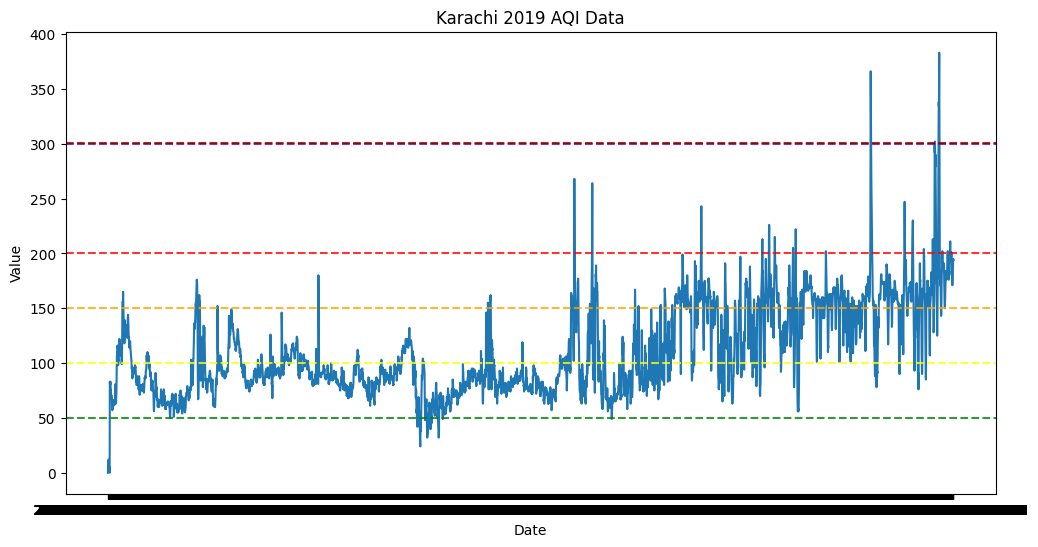

In [ ]:
aqi_levels = {
    "Good (0-50)": (50, 'green'),
    "Moderate (51-100)": (100, 'yellow'),
    "Unhealthy for Sensitive Groups (101-150)": (150, 'orange'),
    "Unhealthy (151-200)": (200, 'red'),
    "Very Unhealthy (201-300)": (300, 'purple'),
    "Hazardous (301+)": (301, 'maroon')
}
plt.figure(figsize=(12,6))
plt.plot(karachi2019datetime, karachi2019AQI)
plt.title('Karachi 2019 AQI Data')
plt.xlabel('Date')
plt.ylabel('Value')
for label, (value, color) in aqi_levels.items():
    plt.axhline(y=value, color=color, linestyle='--', linewidth=1.5, alpha=0.8, label=label)

In [ ]:
plt.show()

In [ ]:
karachi2019_df['post'] = karachi2019_df[]
karachi2019_df['treated'] = karachi2019_df
karachi2019_df['interaction'] = karachi2019_df['post'] * karachi2019_df['treated']

ValueError: Cannot set a DataFrame with multiple columns to the single column post

In [ ]:
model = smf.ols('outcome ~ post + group_treated + post:group_treated', data=karachi2019_df).fit()

print(model.summary())

PatsyError: Error evaluating factor: NameError: name 'post' is not defined
    outcome ~ post + group_treated + post:group_treated
              ^^^^